# FEM solution to 

$ 
 -\left(\dfrac{\partial ^2v}{\partial r^{2}} + 
\dfrac{1}{r}\,\dfrac{\partial v}{\partial r} + \dfrac{\partial ^2v}{\partial {z^2}}   \right) = f
$ 

with Dirichlet condition $v = 0$ on $\partial D,$ where the curvature of the border $\partial D$ of a planar region $D$ changes sign 


In [10]:
import mshr
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

## The mesh

The make up of region $D$ using the library *mshr*

[Take a look at mhsr API](https://bitbucket.org/fenics-project/mshr/wiki/API)

In [11]:
ra = 1
square = mshr.Rectangle(Point(-ra*np.sqrt(2)/2,-ra*np.sqrt(2)/2), Point(ra*np.sqrt(2)/2,ra*np.sqrt(2)/2))
diskT = mshr.Circle(Point(0,ra*np.sqrt(2)), ra)
diskB = mshr.Circle(Point(0,-ra*np.sqrt(2) ), ra)  
diskL = mshr.Circle(Point(-ra*np.sqrt(2) , 0), ra)
diskR = mshr.Circle(Point(ra*np.sqrt(2), 0), ra) 
dom1 = square + (diskR+ diskL) - (diskT+ diskB)
domain = mshr.CSGTranslation(dom1, Point(4*ra,0))
dom2 = mshr.Rectangle(Point(-ra,-ra/2), Point(ra,ra/2))
domain2 = mshr.CSGTranslation(dom2, Point(1.1*ra,0))

In [12]:
mesh = mshr.generate_mesh(domain, 50)

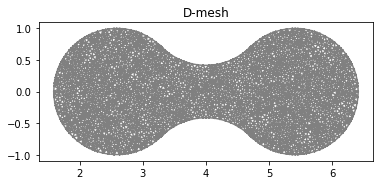

In [14]:
plot(mesh, title="D-mesh")

## Weak formulation of the problem

[See FENICS PR](https://fenicsproject.org/)

In [5]:
V = FunctionSpace(mesh, "Lagrange", 1)

In [6]:
def boundary(x, on_boundary):
    return on_boundary

In [7]:
bc = DirichletBC(V, Constant(0.0), boundary)

In [8]:
u0 = Constant(0.0)
weight = Constant(5.0)

In [9]:
u = TrialFunction(V)
v = TestFunction(V)
g = Expression("1/x[0]", degree=2)
a = inner(grad(u), grad(v))*dx - g*Dx(u, 0)*v*dx  
L = v*weight*dx  


In [10]:
u = Function(V)
solve(a == L, u, bc)

## Exporting the solution to be viewed with Paraview


[See Paraview](https://www.paraview.org/tutorials/)

In [14]:
file = File("poisson_reg_D.pvd")
file << u

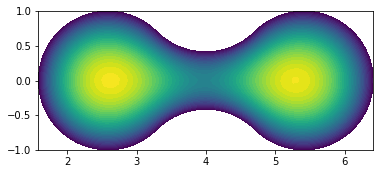

In [15]:
plot(u)
plt.show()